<h1 style="color:red"><center>Telecom Churn  Modelling

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  20

Features : 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<p style="color:red">
df["TotalCharges"]=df["TotalCharges"].astype(float)
 <p style="color:blue">
 The above code is giving some error.That must be because there is the some letter that are not digits.After going through its known that space is causing this problem

In [6]:
#Replacing spaces with null values
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
print(df["TotalCharges"].isnull().sum())

11


<p style="color:blue">We see that there is very few null value so we have decided to impute it will the mean value

In [7]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [8]:
m=df["TotalCharges"].mean()
df.fillna(value=m,inplace=True)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<ul style="color:blue">
           <li>Around 16% of customers are senior citizen</li>
    <li>Tenure period ranges drom 0 to 72</li>
    <li>The average tenure period is 32.37.</li>
    <li>Average monthly charge is 64 for customers.</li>
    <li>Average monthly charge is 2283</li>
    <li>We see there is a huge gap between 75 percentile and max compared to median and 75% which suggests us that the data has the outlier in it</li>
           

### Dividing the Categorical and Numerical Features

In [10]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return numeric_col

num = numeric_features(df)
num.remove("SeniorCitizen")
print("Numeric Features:")
print(num)
print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return categorical_col

cate= categorical_features(df)
cate.append('SeniorCitizen')

print("Categorical Features:")
print(cate)




Numeric Features:
['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


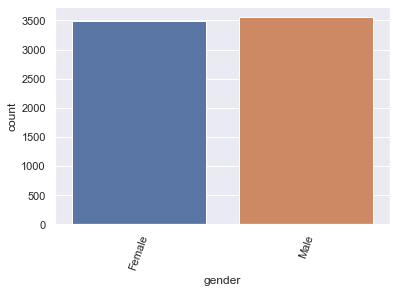

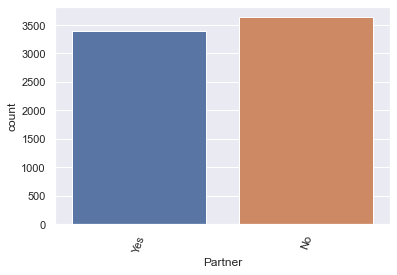

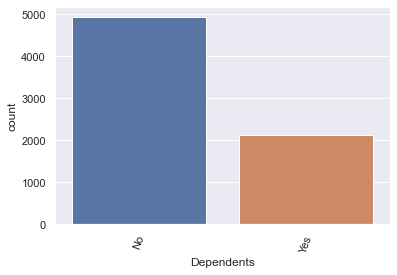

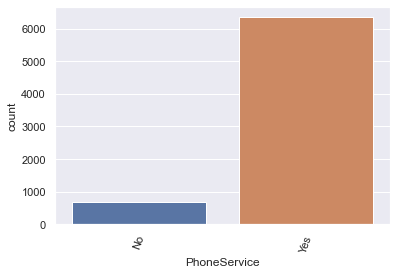

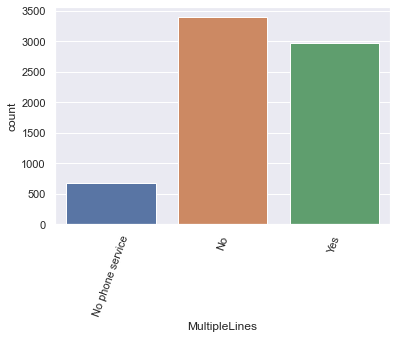

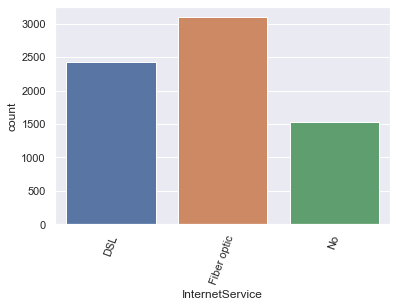

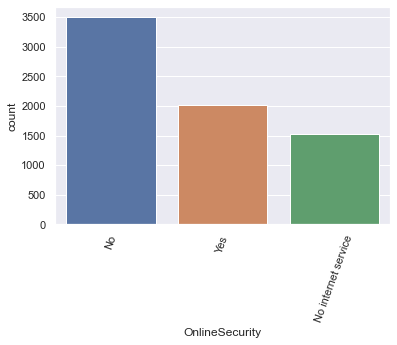

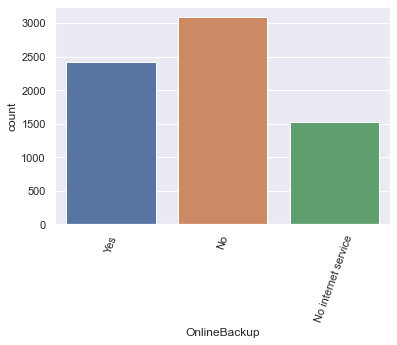

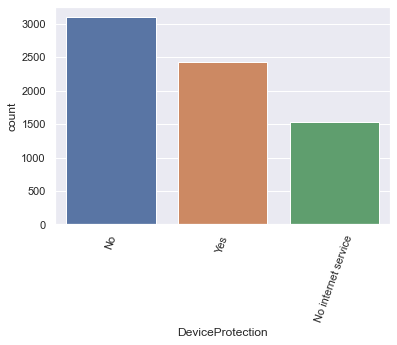

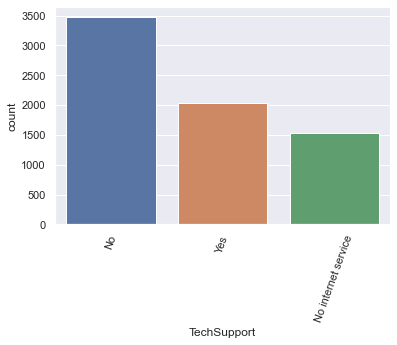

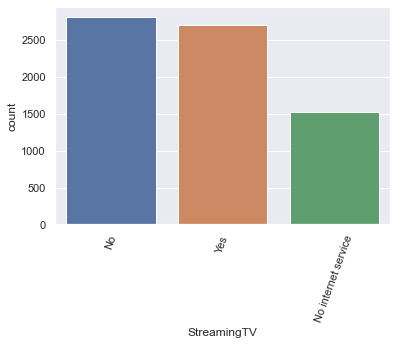

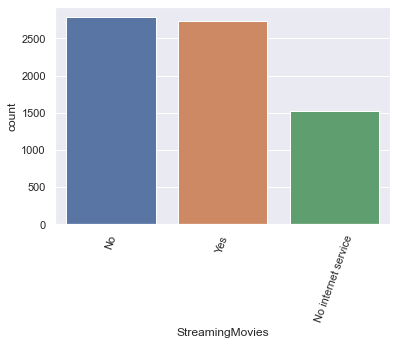

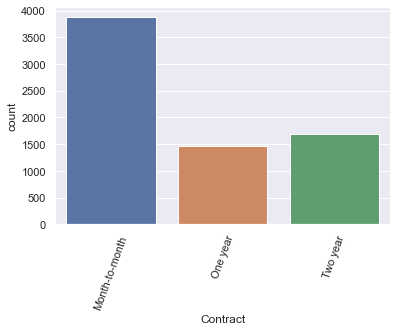

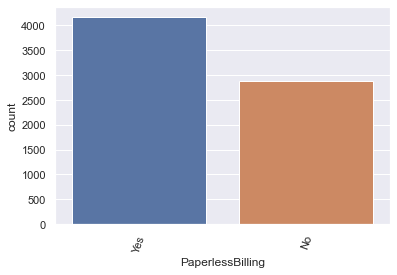

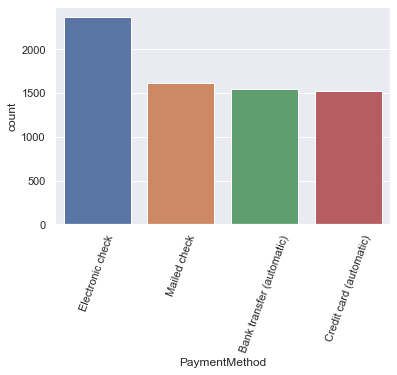

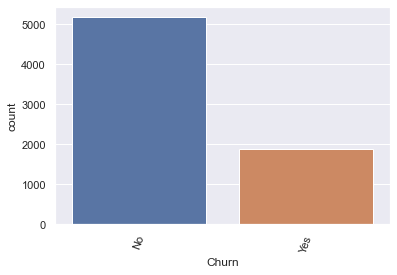

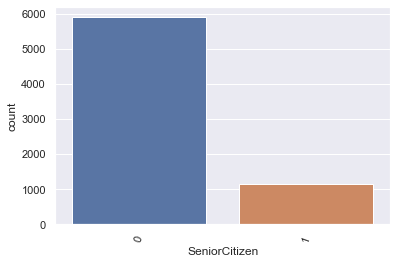

In [11]:
for i in cate:
    plt.figure()
    plt.xticks(rotation=70)
    sns.countplot(i,data=df)

<ul style="color:blue">
    <li>There are equal number of male and female</li>
    <li>Both the category of variabe partner have same count.</li>
    <li>Number of non-Dependent are twice than that of Dependents</li>
    <li>Almost 90% of people have phone service</li>
    <li>Almost 48 % of people have multiple line and 42% of people have single line and remaining have no phone service</li>
    <li>Around 65% of people have done paperless billing</li>
    <li>Maximum number of customer have used Electronic check</li>
    <li>Around 15% of customer comes under the category of senior Citizen</li>
    </ul>

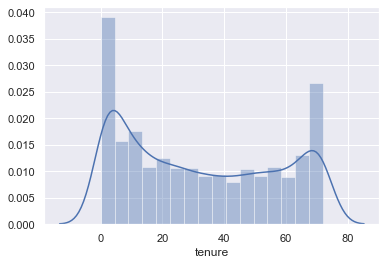

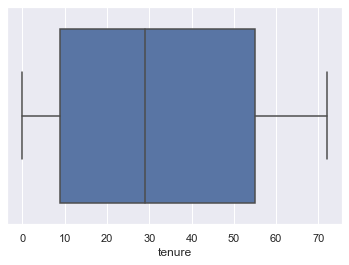

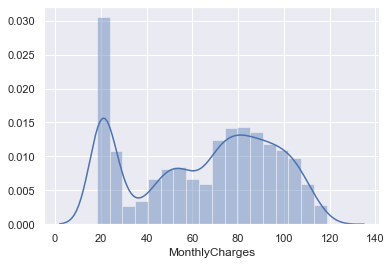

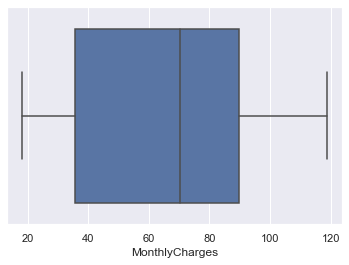

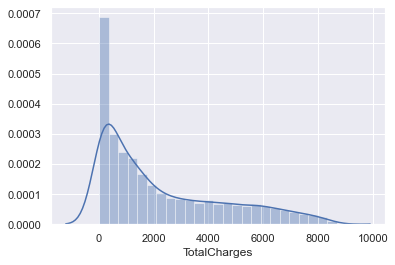

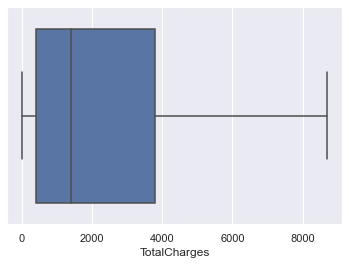

In [12]:
for i in num:
    plt.figure()
    sns.distplot(df[i])
    plt.figure()
    sns.boxplot(df[i])

<ul style="color:blue">
    <li>We see there are no outlier in our data</li>
    <li>Tenure,Monthly Charge and Total Charges variable are highly skewed</li>

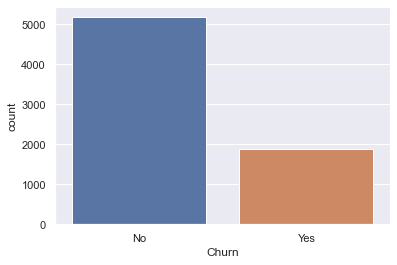

In [13]:
sns.countplot(df["Churn"])

<p style="color:blue;">We see that our data is highly imbalanced since the number of Churned data comprises of only around 25% of whole data and other 75% of data are of non-churned customers</li>

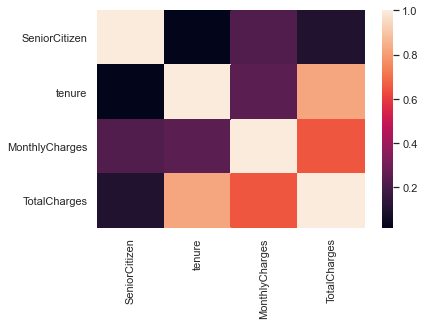

In [14]:
corr = df.corr()
sns.heatmap(corr)

<p style="color:blue">We se that Tenure and Total Charges are highly correlated which may lead to multicollinearity.So we can remove one of the variable to get rid of the problem of multicollinearity</p>

In [15]:
df['Churn'] = df["Churn"].replace("Yes",1)
df['Churn'] = df["Churn"].replace("No",0)
df["Churn"].unique()

array([0, 1], dtype=int64)

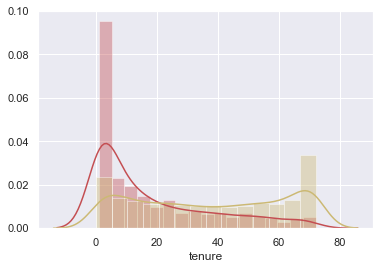

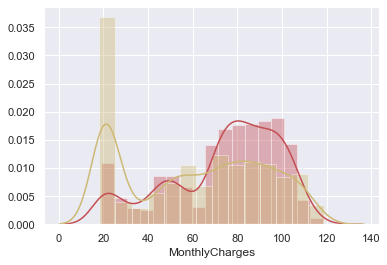

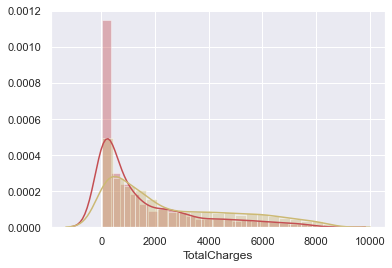

In [16]:
for i in num:
    plt.figure()
    sns.distplot(df[i][df["Churn"]==1],color='r')
    sns.distplot(df[i][df["Churn"]==0],color='y')

<p style="color:red">We see that Total Chrges overlaps in both the cases i.e churn or not churn.Thus we can interpret that the variable total charges is of less important than other features.

In [17]:
num.remove("TotalCharges")

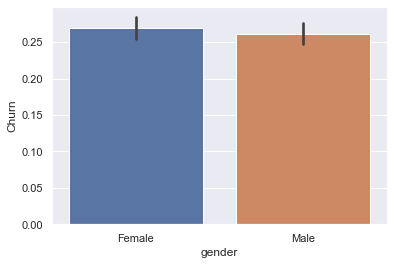

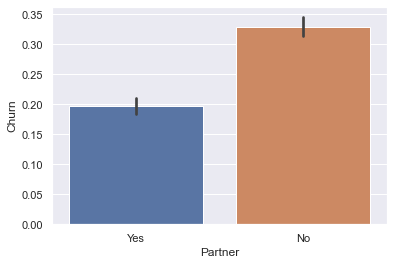

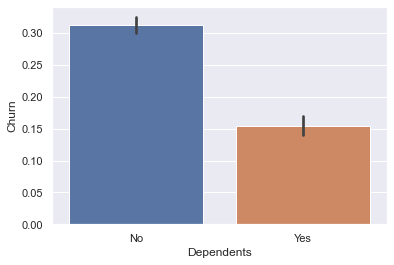

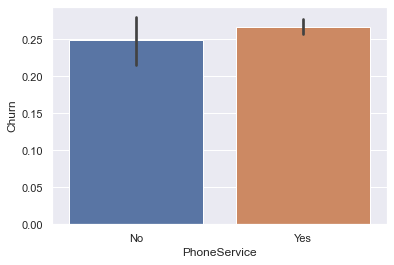

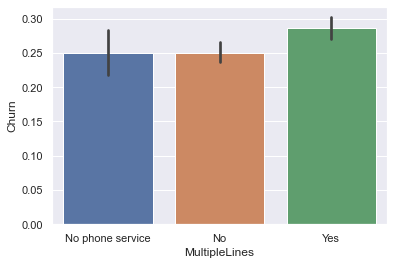

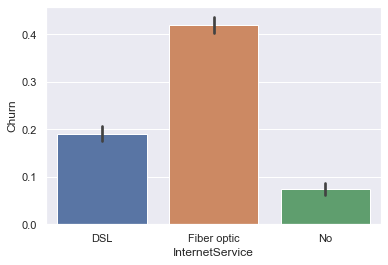

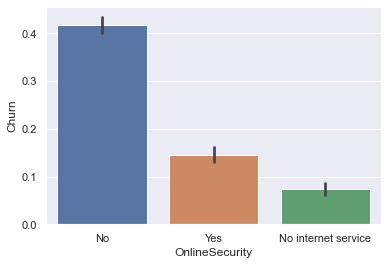

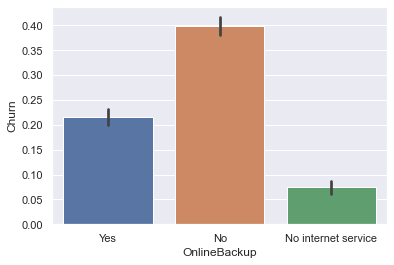

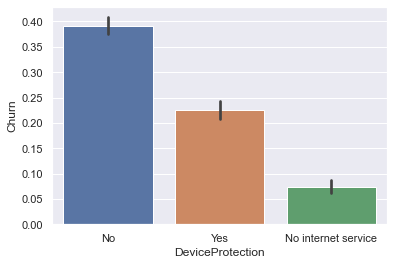

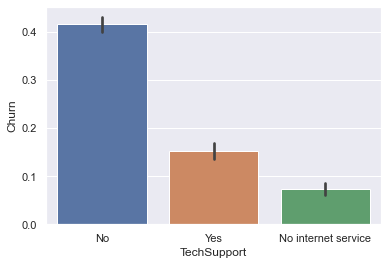

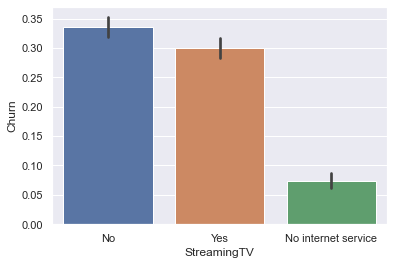

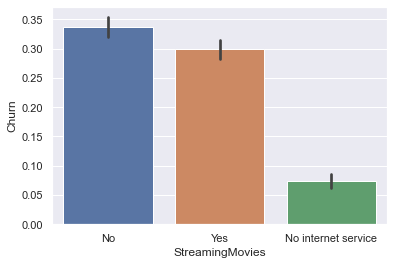

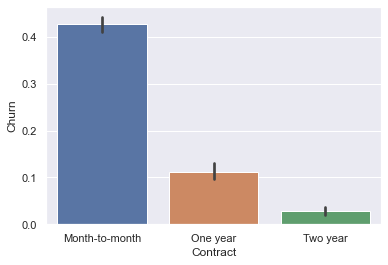

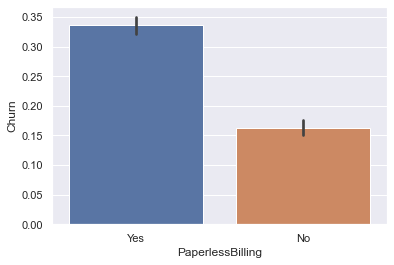

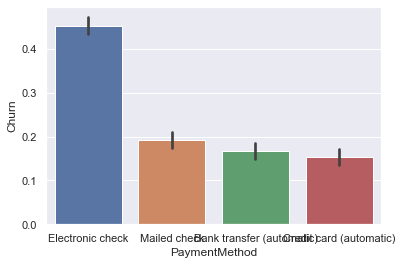

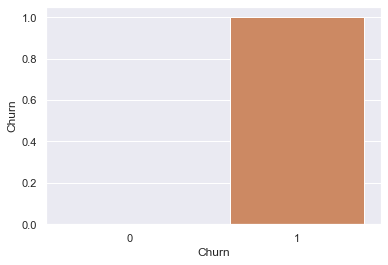

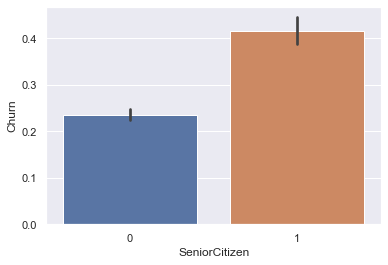

In [18]:
for i in cate:
    plt.figure()
    sns.barplot(x=i, y="Churn", data=df)

In [19]:
df["Churn"].mean()

0.2653698707936959

In [20]:
for i in cate:
    print(df.groupby(i)["Churn"].mean())
    print("--------------------------------------------------------------------------------")

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64
--------------------------------------------------------------------------------
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64
--------------------------------------------------------------------------------
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64
--------------------------------------------------------------------------------
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64
--------------------------------------------------------------------------------
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64
--------------------------------------------------------------------------------
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64
-----------------------------------------------------------------

<p style="color:red">From above we get that the variables like gender,Multiple Lines,PhoneService,StreamingMovies,StreamingTV have same mean for all its category.From this we can interpret that these variables are of less important than other variables.

<center><h3 style="color:blue">Less Important features</h3>
    <p style="text-align:center">From Our Analysis Done Above (Univariate and Bivariate Analysis)<p>
    <hr>
    </center>
    
<ul style="color:red">
    <li>Gender</li>
    <li>MultipleLines</li>
    <li>Phone Service</li>
    <li>StreamingMovies</li>
    <li>StreamingTV</li>
    <li>Internet Service</li>
</ul>

In [21]:
cate.remove("gender")
cate.remove("PhoneService")
cate.remove("MultipleLines")
cate.remove("StreamingTV")
cate.remove("StreamingMovies")

## Data Preprocessing

In [22]:
df.drop(["gender","PhoneService","MultipleLines","StreamingTV","StreamingMovies","TotalCharges","InternetService"],axis=1,inplace=True)

In [23]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,Yes,No,Yes,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [24]:
X=df.drop(["Churn"],axis=1)
Y=df["Churn"]

In [25]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [26]:
X["Partner"]=l1.fit_transform(X["Partner"])
X["Dependents"]=l1.fit_transform(X["Dependents"])
X["PaperlessBilling"]=l1.fit_transform(X["PaperlessBilling"])

In [27]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,No,Yes,No,No,Month-to-month,1,Electronic check,29.85
1,0,0,0,34,Yes,No,Yes,No,One year,0,Mailed check,56.95
2,0,0,0,2,Yes,Yes,No,No,Month-to-month,1,Mailed check,53.85
3,0,0,0,45,Yes,No,Yes,Yes,One year,0,Bank transfer (automatic),42.30
4,0,0,0,2,No,No,No,No,Month-to-month,1,Electronic check,70.70


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [29]:
encoder=ColumnTransformer([("one",OneHotEncoder(),[4,5,6,7,8,10]),("sc",StandardScaler(),[3,11])],remainder='passthrough')

In [30]:
X=encoder.fit_transform(X)

In [31]:
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.277445,-1.160323,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.066327,-0.259629,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-1.236724,-0.362660,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.514251,-0.746535,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-1.236724,0.197365,0.0,0.0,0.0,1.0


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

## Model Building

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
X.shape

(7043, 25)

In [115]:
model=DecisionTreeClassifier(max_depth =5,
                             max_leaf_nodes=25,
                                           criterion = "entropy",
                             random_state=0
                                          )

model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [116]:
pred=model.predict(xtest)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.7821149751596878

### MLP Classifier

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
algo=MLPClassifier(hidden_layer_sizes=(100,50))

In [41]:
algo.fit(xtrain,ytrain)

C:\Users\Gaurav\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [42]:
pred=algo.predict(xtest)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.7707594038325053